___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 4<br><br>Classification with ANN<br><br>Cancer Data<br><h1>

# Keras Classification

In [1]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print("You can safely ignore this.")

You can safely ignore this.


In [2]:
import os

# Set tensorflow log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Uncomment the following lines if you want to suppress warnings:
# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

In [4]:
# Get python version
!python --version

Python 3.10.11


In [ ]:
# Get tensorflow version
import tensorflow as tf

tf.__version__

In [ ]:
# List cuda-capable gpu's that are attached to this session
if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

GPU support is enabled for this session.


In [ ]:
# Get more information about gpu (if available)
if tf.config.list_physical_devices("GPU"):
    !nvidia-smi

Thu Apr 27 13:54:20 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.47                 Driver Version: 531.68       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3090         On | 00000000:02:00.0 Off |                  N/A |
|  0%   41C    P8               17W / 350W|     15MiB / 24576MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()

In [ ]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(cancer["target_names"])

['malignant' 'benign']


In [ ]:
print(cancer["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
cancer["feature_names"]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
df_feat = pd.DataFrame(cancer["data"], columns=cancer["feature_names"])
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,8.589,153.400,0.006,0.049,0.054,0.016,0.030,0.006,25.380,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119
1,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,0.057,0.543,0.734,3.398,74.080,0.005,0.013,0.019,0.013,0.014,0.004,24.990,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089
2,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,0.060,0.746,0.787,4.585,94.030,0.006,0.040,0.038,0.021,0.022,0.005,23.570,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088
3,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,0.097,0.496,1.156,3.445,27.230,0.009,0.075,0.057,0.019,0.060,0.009,14.910,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173
4,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,0.059,0.757,0.781,5.438,94.440,0.011,0.025,0.057,0.019,0.018,0.005,22.540,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077


In [ ]:
df_target = pd.DataFrame(cancer["target"], columns=["Cancer"])
df_target.head()

,Cancer
0,0
1,0
2,0
3,0
4,0


In [ ]:
frames = [df_feat, df_target]
df = pd.concat(frames, axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer
0,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,8.589,153.400,0.006,0.049,0.054,0.016,0.030,0.006,25.380,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119,0
1,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,0.057,0.543,0.734,3.398,74.080,0.005,0.013,0.019,0.013,0.014,0.004,24.990,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089,0
2,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,0.060,0.746,0.787,4.585,94.030,0.006,0.040,0.038,0.021,0.022,0.005,23.570,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088,0
3,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,0.097,0.496,1.156,3.445,27.230,0.009,0.075,0.057,0.019,0.060,0.009,14.910,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173,0
4,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,0.059,0.757,0.781,5.438,94.440,0.011,0.025,0.057,0.019,0.018,0.005,22.540,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077,0


## Exploratory Data Analysis and Visualization

In [ ]:
df.shape

(569, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.000,14.127,3.524,6.981,11.700,13.370,15.780,28.110
mean texture,569.000,19.290,4.301,9.710,16.170,18.840,21.800,39.280
mean perimeter,569.000,91.969,24.299,43.790,75.170,86.240,104.100,188.500
mean area,569.000,654.889,351.914,143.500,420.300,551.100,782.700,2501.000
mean smoothness,569.000,0.096,0.014,0.053,0.086,0.096,0.105,0.163
mean compactness,569.000,0.104,0.053,0.019,0.065,0.093,0.130,0.345
mean concavity,569.000,0.089,0.080,0.000,0.030,0.062,0.131,0.427
mean concave points,569.000,0.049,0.039,0.000,0.020,0.034,0.074,0.201
mean symmetry,569.000,0.181,0.027,0.106,0.162,0.179,0.196,0.304
mean fractal dimension,569.000,0.063,0.007,0.050,0.058,0.062,0.066,0.097


In [ ]:
df.Cancer.value_counts()

Cancer
1    357
0    212
Name: count, dtype: int64

<Axes: xlabel='Cancer', ylabel='count'>

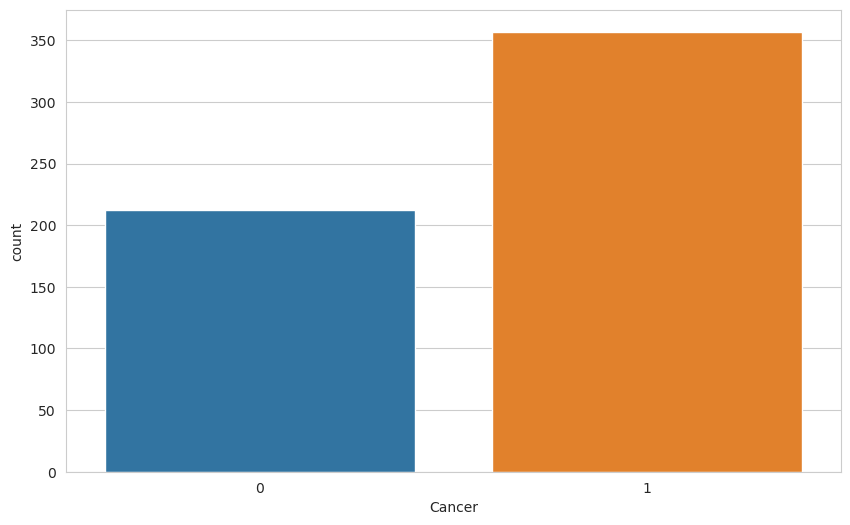

In [ ]:
sns.countplot(x=df["Cancer"])

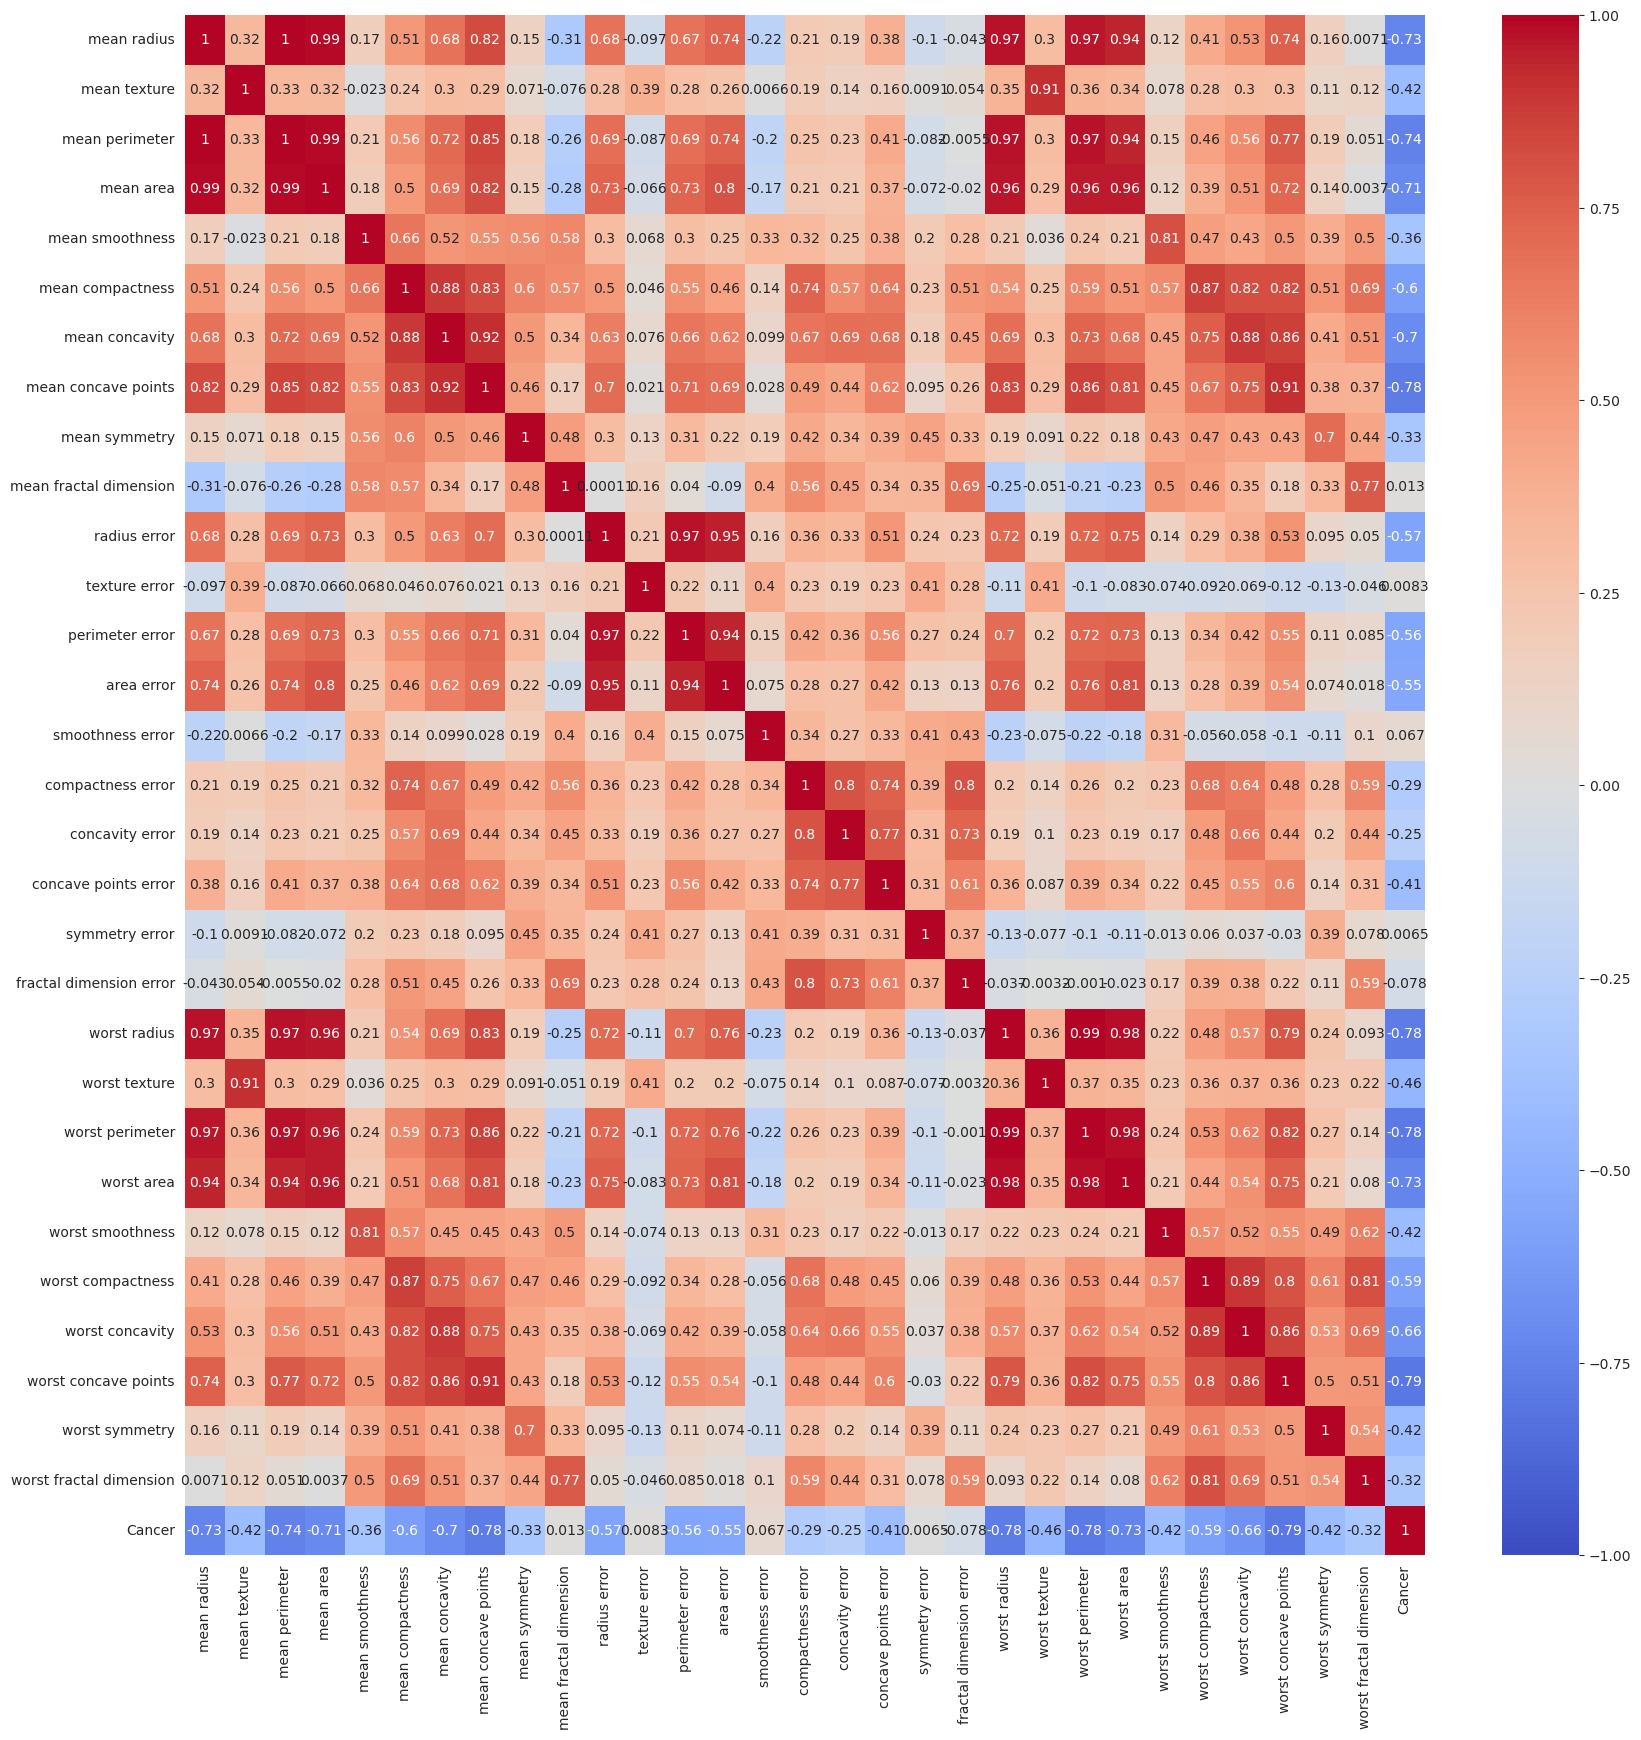

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

In [ ]:
drop_list = [
    "worst perimeter",
    "worst area",
    "perimeter error",
    "area error",
    "mean perimeter",
    "mean area",
]

In [ ]:
df = df.drop(drop_list, axis=1)

In [ ]:
df.shape

(569, 25)

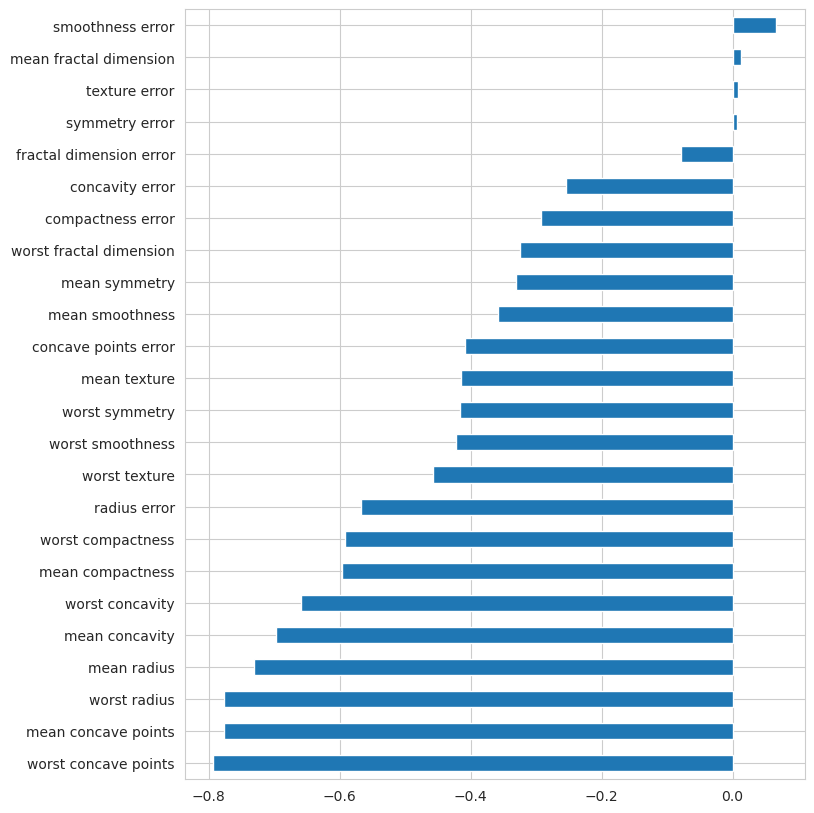

In [ ]:
plt.figure(figsize=(8, 10))
df.corr()["Cancer"].sort_values().drop("Cancer").plot(kind="barh")
plt.show()

## Preprocessing of Data
1. Split the data into train and test sets.
2. Scale the dataset.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X = df.drop("Cancer", axis=1)
y = df["Cancer"]

In [ ]:
seed = 42

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.10, random_state=seed
)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train.shape

(512, 24)

In [ ]:
X_test.shape

(57, 24)

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(
    x=X_train, y=y_train, validation_split=0.1, batch_size=32, epochs=1000, verbose=1
)

Epoch 1/1000
15/15 [==============================] - 3s 14ms/step - loss: 0.6985 - accuracy: 0.3696 - val_loss: 0.6293 - val_accuracy: 0.6346
Epoch 2/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.6362 - accuracy: 0.7804 - val_loss: 0.5987 - val_accuracy: 0.9615
Epoch 3/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.5961 - accuracy: 0.9065 - val_loss: 0.5500 - val_accuracy: 0.9423
Epoch 4/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.5481 - accuracy: 0.8957 - val_loss: 0.4918 - val_accuracy: 0.9615
Epoch 5/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.4909 - accuracy: 0.9022 - val_loss: 0.4244 - val_accuracy: 0.9615
Epoch 6/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.4308 - accuracy: 0.8978 - val_loss: 0.3615 - val_accuracy: 0.9615
Epoch 7/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.3691 - accuracy: 0.9065 - val_loss: 0.2887 - val_accuracy: 0.9615
Epoch

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                900       
                                                                 
 dense_1 (Dense)             (None, 18)                666       
                                                                 
 dense_2 (Dense)             (None, 9)                 171       
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1,747
Trainable params: 1,747
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.699,0.370,0.629,0.635
1,0.636,0.780,0.599,0.962
2,0.596,0.907,0.550,0.942
3,0.548,0.896,0.492,0.962
4,0.491,0.902,0.424,0.962


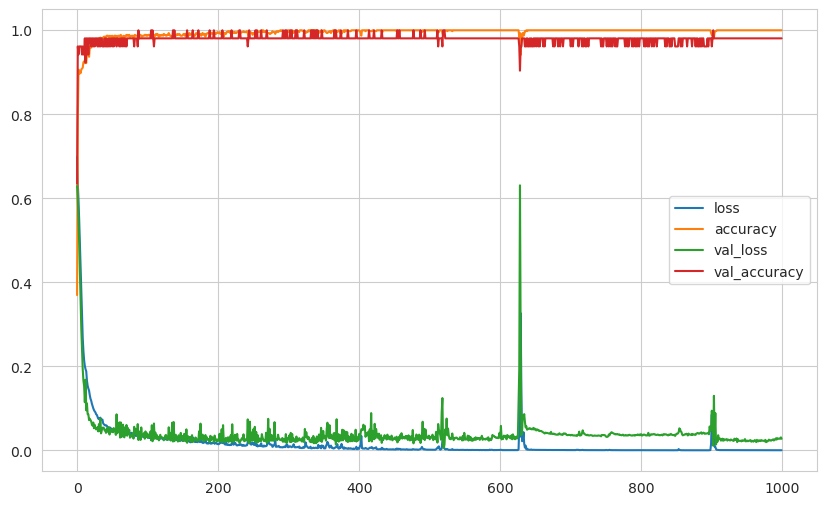

In [ ]:
loss_df.plot()
plt.show()

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

[0.3111572265625, 0.9298245906829834]

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.3111572265625
accuracy:  0.9298245906829834


In [ ]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

2/2 [==============================] - 0s 3ms/step
[[20  1]
 [ 3 33]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        21
           1       0.97      0.92      0.94        36

    accuracy                           0.93        57
   macro avg       0.92      0.93      0.93        57
weighted avg       0.93      0.93      0.93        57



### EarlyStopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
# The patience is often set somewhere between 10 and 100
# (10 or 25 is more common), but it really depends on your dataset and network.

In [ ]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [ ]:
model.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    batch_size=32,
    epochs=1000,
    verbose=1,
    callbacks=[early_stop],
)

Epoch 1/1000
15/15 [==============================] - 1s 15ms/step - loss: 0.6878 - accuracy: 0.4000 - val_loss: 0.6646 - val_accuracy: 0.7692
Epoch 2/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6642 - accuracy: 0.7848 - val_loss: 0.6384 - val_accuracy: 0.8654
Epoch 3/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6217 - accuracy: 0.8304 - val_loss: 0.5975 - val_accuracy: 0.8462
Epoch 4/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.5655 - accuracy: 0.8630 - val_loss: 0.5298 - val_accuracy: 0.8846
Epoch 5/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.4980 - accuracy: 0.8630 - val_loss: 0.4528 - val_accuracy: 0.9038
Epoch 6/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.4272 - accuracy: 0.9043 - val_loss: 0.3711 - val_accuracy: 0.9038
Epoch 7/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.3579 - accuracy: 0.9087 - val_loss: 0.2894 - val_accuracy: 0.9423
Epoch

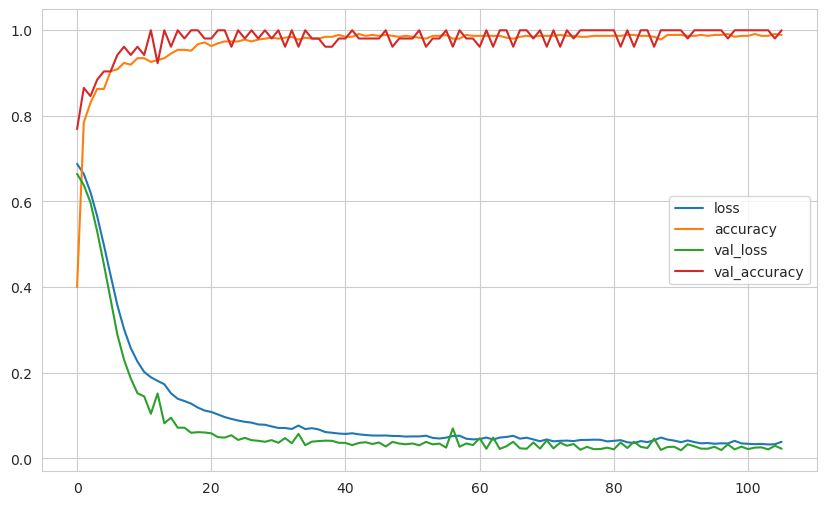

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.13713188469409943
accuracy:  0.9298245906829834


In [ ]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

2/2 [==============================] - 0s 5ms/step
[[20  1]
 [ 3 33]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        21
           1       0.97      0.92      0.94        36

    accuracy                           0.93        57
   macro avg       0.92      0.93      0.93        57
weighted avg       0.93      0.93      0.93        57



### learning_rate

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [ ]:
model.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    batch_size=32,
    epochs=1000,
    verbose=1,
    callbacks=[early_stop],
)

Epoch 1/1000
15/15 [==============================] - 1s 15ms/step - loss: 0.5849 - accuracy: 0.7870 - val_loss: 0.4202 - val_accuracy: 0.8654
Epoch 2/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.3160 - accuracy: 0.9130 - val_loss: 0.1496 - val_accuracy: 0.9615
Epoch 3/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.1842 - accuracy: 0.9283 - val_loss: 0.0871 - val_accuracy: 0.9615
Epoch 4/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.1496 - accuracy: 0.9370 - val_loss: 0.0667 - val_accuracy: 1.0000
Epoch 5/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.1772 - accuracy: 0.9261 - val_loss: 0.0571 - val_accuracy: 1.0000
Epoch 6/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.1152 - accuracy: 0.9587 - val_loss: 0.0473 - val_accuracy: 1.0000
Epoch 7/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.1069 - accuracy: 0.9696 - val_loss: 0.0535 - val_accuracy: 0.9615
Epoch

<Axes: >

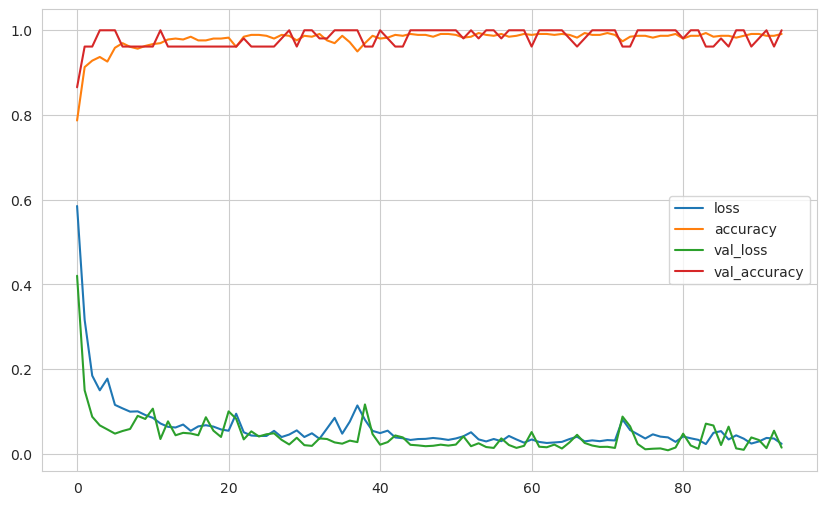

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.20154693722724915
accuracy:  0.9298245906829834


In [ ]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

2/2 [==============================] - 0s 5ms/step
[[20  1]
 [ 3 33]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        21
           1       0.97      0.92      0.94        36

    accuracy                           0.93        57
   macro avg       0.92      0.93      0.93        57
weighted avg       0.93      0.93      0.93        57



### Dropout

The Dropout layer randomly sets input units to 0 with a frequency of `rate`
at each step during training time, which helps prevent overfitting.

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(
    x=X_train, y=y_train, validation_split=0.1, batch_size=32, epochs=1000, verbose=1
)

Epoch 1/1000
15/15 [==============================] - 1s 14ms/step - loss: 0.7514 - accuracy: 0.4196 - val_loss: 0.6815 - val_accuracy: 0.5769
Epoch 2/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6940 - accuracy: 0.5500 - val_loss: 0.6794 - val_accuracy: 0.7692
Epoch 3/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6831 - accuracy: 0.5457 - val_loss: 0.6746 - val_accuracy: 0.6923
Epoch 4/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6639 - accuracy: 0.6435 - val_loss: 0.6650 - val_accuracy: 0.6538
Epoch 5/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6579 - accuracy: 0.6761 - val_loss: 0.6487 - val_accuracy: 0.6731
Epoch 6/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6377 - accuracy: 0.7152 - val_loss: 0.6240 - val_accuracy: 0.7885
Epoch 7/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.6272 - accuracy: 0.7109 - val_loss: 0.6031 - val_accuracy: 0.8269
Epoch

<Axes: >

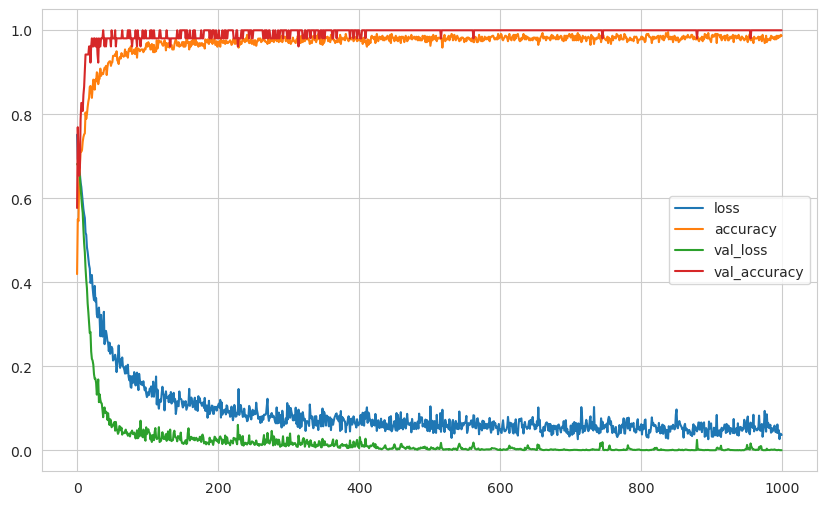

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.14551202952861786
accuracy:  0.9649122953414917


In [ ]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

2/2 [==============================] - 0s 3ms/step
[[20  1]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        36

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



## Cross Validation

**Keras models** can be used in **scikit-learn** by wrapping them with the **KerasClassifier** or **KerasRegressor** class.

To use these wrappers you must define a function that creates and returns your Keras sequential model, then pass this function to the build_fn argument when constructing the KerasClassifier class.

The constructor for the KerasClassifier class can take default arguments that are passed on to the calls to model.fit(), such as the number of epochs and the batch size.

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
def build_classifier():
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units=36, activation="relu"))
    classifier.add(Dense(units=18, activation="relu"))
    classifier.add(Dense(units=9, activation="relu"))
    classifier.add(Dense(units=1, activation="sigmoid"))
    classifier.compile(
        optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]
    )
    return classifier

In [ ]:
classifier_model = KerasClassifier(
    build_fn=build_classifier, batch_size=32, epochs=100, verbose=0
)

scores = cross_validate(
    estimator=classifier_model,
    X=X_train,
    y=y_train,
    scoring=["accuracy", "precision", "recall", "f1"],
    cv=10,
)

df_scores = pd.DataFrame(scores, index=range(1, 11)).iloc[:, 2:]

df_scores

/tmp/ipykernel_5438/538154760.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier_model = KerasClassifier(


2/2 [==============================] - 0s 3ms/step


2/2 [==============================] - 0s 3ms/step


,test_accuracy,test_precision,test_recall,test_f1
1,0.962,0.968,0.968,0.968
2,1.000,1.000,1.000,1.000
3,0.961,0.946,1.000,0.972
4,1.000,1.000,1.000,1.000
5,0.941,0.919,1.000,0.958
6,0.961,0.971,0.971,0.971
7,1.000,1.000,1.000,1.000
8,0.980,1.000,0.971,0.985
9,1.000,1.000,1.000,1.000
10,0.980,0.962,1.000,0.980


In [ ]:
df_scores_summary = pd.DataFrame(
    {"score_mean": df_scores.mean().values, "score_std": df_scores.std().values},
    index=["acc", "pre", "rec", "f1"],
)

df_scores_summary

,score_mean,score_std
acc,0.979,0.022
pre,0.976,0.029
rec,0.991,0.015
f1,0.983,0.016


## GridSearchCV

https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

In [ ]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

In [ ]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [ ]:
trial_metric = "accuracy"
batch_size = 64


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    tf.random.set_seed(42)
    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        epochs=100,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-04-27 14:00:06,370] A new study created in memory with name: no-name-14fd1e71-cfe0-4d15-880d-b5ba8272813f
/home/nashubuntu/miniconda3/envs/tf/lib/python3.9/site-packages/optuna/distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
/home/nashubuntu/miniconda3/envs/tf/lib/python3.9/site-packages/optuna/distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
/home/nashubuntu/miniconda3/envs/tf/lib/python3.9/site-packages/optuna/distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'k

Restoring model weights from the end of the best epoch: 33.
Epoch 48: early stopping


[I 2023-04-27 14:00:16,097] Trial 1 finished with value: 0.9824561476707458 and parameters: {'n_units1': 31, 'n_units2': 9, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.007369713797136866, 'w0': 1.9874653752460731, 'w1': 0.16069087211694735}. Best is trial 1 with value: 0.9824561476707458.


Restoring model weights from the end of the best epoch: 12.
Epoch 27: early stopping


[I 2023-04-27 14:00:18,585] Trial 2 finished with value: 0.9824561476707458 and parameters: {'n_units1': 27, 'n_units2': 38, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.009977206937792388, 'w0': 0.07003594154577747, 'w1': 0.023821477747056903}. Best is trial 1 with value: 0.9824561476707458.
[I 2023-04-27 14:00:24,959] Trial 3 finished with value: 0.6315789222717285 and parameters: {'n_units1': 111, 'n_units2': 118, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0004149074206831293, 'w0': 0.17029483457063524, 'w1': 0.16093170237389695}. Best is trial 1 with value: 0.9824561476707458.


Restoring model weights from the end of the best epoch: 58.
Epoch 73: early stopping


[I 2023-04-27 14:00:29,440] Trial 4 finished with value: 0.6315789222717285 and parameters: {'n_units1': 68, 'n_units2': 118, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.019633428995907493, 'w0': 0.024347980288932567, 'w1': 0.19674846940285753}. Best is trial 1 with value: 0.9824561476707458.


Restoring model weights from the end of the best epoch: 33.
Epoch 48: early stopping


[I 2023-04-27 14:00:32,643] Trial 5 finished with value: 0.8947368264198303 and parameters: {'n_units1': 120, 'n_units2': 84, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0009066552023243687, 'w0': 0.1607885641002329, 'w1': 0.04615459814574156}. Best is trial 1 with value: 0.9824561476707458.
[I 2023-04-27 14:00:38,433] Trial 6 finished with value: 0.8771929740905762 and parameters: {'n_units1': 32, 'n_units2': 90, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.00014854468045703294, 'w0': 0.018694516204500716, 'w1': 0.011486043136106409}. Best is trial 1 with value: 0.9824561476707458.


Restoring model weights from the end of the best epoch: 7.
Epoch 22: early stopping


[I 2023-04-27 14:00:40,732] Trial 7 finished with value: 0.9824561476707458 and parameters: {'n_units1': 60, 'n_units2': 67, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.05184518866539752, 'w0': 0.026896224538272093, 'w1': 0.058836091060029294}. Best is trial 1 with value: 0.9824561476707458.


Restoring model weights from the end of the best epoch: 7.
Epoch 22: early stopping


[I 2023-04-27 14:00:43,496] Trial 8 finished with value: 0.6315789222717285 and parameters: {'n_units1': 27, 'n_units2': 106, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.00013705587025401644, 'w0': 0.06529330369021126, 'w1': 0.6958986239143475}. Best is trial 1 with value: 0.9824561476707458.


Restoring model weights from the end of the best epoch: 29.
Epoch 44: early stopping


[I 2023-04-27 14:00:47,873] Trial 9 finished with value: 0.9649122953414917 and parameters: {'n_units1': 99, 'n_units2': 61, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.0017372986486086943, 'w0': 0.03160583620844966, 'w1': 0.019727503099420715}. Best is trial 1 with value: 0.9824561476707458.


{'n_units1': 31,
 'n_units2': 9,
 'optimizer': keras.optimizers.rmsprop.RMSprop,
 'learning_rate': 0.007369713797136866,
 'w0': 1.9874653752460731,
 'w1': 0.16069087211694735}

In [ ]:
# build model with optuna parameters
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)
tf.random.set_seed(42)
model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    batch_size=512,
    epochs=100,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/100
1/1 [==============================] - 1s 817ms/step - loss: 0.7154 - recall: 0.0000e+00 - val_loss: 0.6775 - val_recall: 0.7692
Epoch 2/100
1/1 [==============================] - 0s 35ms/step - loss: 0.6725 - recall: 0.8475 - val_loss: 0.6184 - val_recall: 0.2692
Epoch 3/100
1/1 [==============================] - 0s 32ms/step - loss: 0.6475 - recall: 0.2475 - val_loss: 0.6307 - val_recall: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 37ms/step - loss: 0.6110 - recall: 1.0000 - val_loss: 0.5533 - val_recall: 0.8077
Epoch 5/100
1/1 [==============================] - 0s 33ms/step - loss: 0.5924 - recall: 0.6339 - val_loss: 0.6040 - val_recall: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 36ms/step - loss: 0.5661 - recall: 1.0000 - val_loss: 0.4959 - val_recall: 0.8846
Epoch 7/100
1/1 [==============================] - 0s 38ms/step - loss: 0.5468 - recall: 0.7017 - val_loss: 0.5438 - val_recall: 1.0000
Epoch 8/100
1/1 [==========================

In [ ]:
history = model.history.history

Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

2/2 [==============================] - 0s 3ms/step
[[20  1]
 [ 5 31]]
              precision    recall  f1-score   support

           0       0.80      0.95      0.87        21
           1       0.97      0.86      0.91        36

    accuracy                           0.89        57
   macro avg       0.88      0.91      0.89        57
weighted avg       0.91      0.89      0.90        57



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

2/2 [==============================] - 0s 4ms/step


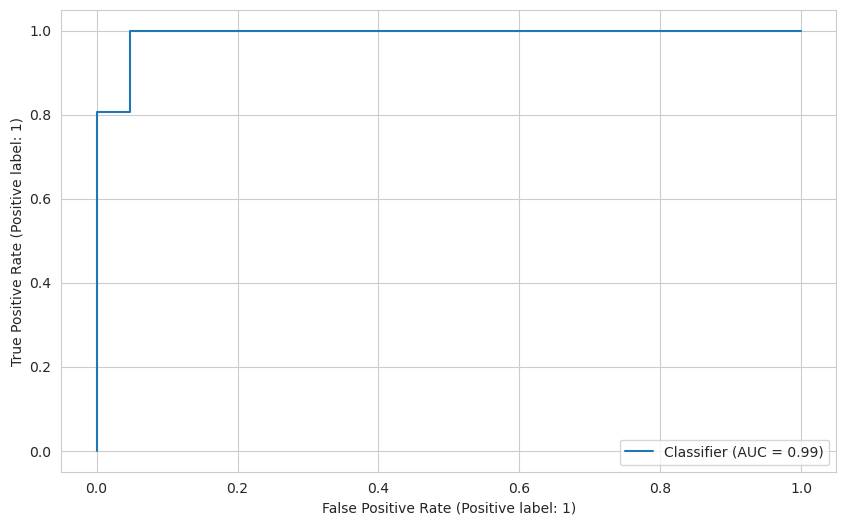

In [ ]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [ ]:
roc_auc_score(y_test, y_pred_proba)

0.9907407407407407

## Saving Final Model and Scaler

In [ ]:
import pickle

pickle.dump(scaler, open("scaler_cancer", "wb"))

<Axes: >

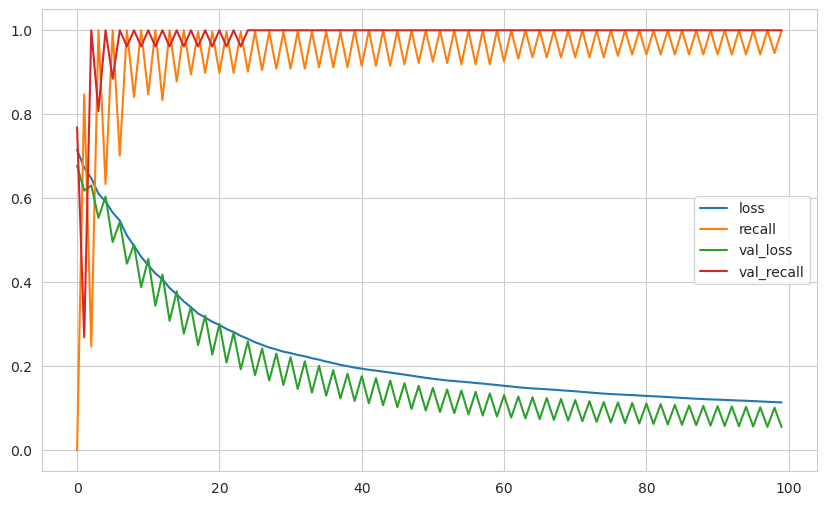

In [ ]:
loss_df = pd.DataFrame(history)
loss_df.plot()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.16905787587165833
accuracy:  0.8611111044883728


In [ ]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

2/2 [==============================] - 0s 5ms/step
[[20  1]
 [ 5 31]]
              precision    recall  f1-score   support

           0       0.80      0.95      0.87        21
           1       0.97      0.86      0.91        36

    accuracy                           0.89        57
   macro avg       0.88      0.91      0.89        57
weighted avg       0.91      0.89      0.90        57



In [ ]:
model.save("model_cancer.h5")

## Loading Model and Scaler

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model_cancer = load_model("model_cancer.h5")
scaler_cancer = pickle.load(open("scaler_cancer", "rb"))

## Prediction

In [ ]:
single_patient = df.drop("Cancer", axis=1).iloc[0:1, :]
single_patient

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.380,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,0.006,0.049,0.054,0.016,0.030,0.006,25.380,17.330,0.162,0.666,0.712,0.265,0.460,0.119


In [ ]:
single_patient = scaler_cancer.transform(single_patient)
single_patient

array([[0.52103744, 0.0226581 , 0.68000973, 0.7920373 , 0.70313964,
        0.73111332, 0.68636364, 0.60551811, 0.35614702, 0.12046941,
        0.15929565, 0.35139844, 0.13568182, 0.30062512, 0.31164518,
        0.18304244, 0.62077552, 0.14152452, 0.61828432, 0.61929156,
        0.56861022, 0.91202749, 0.59846245, 0.41886396]])

In [ ]:
(model_cancer.predict(single_patient) > 0.5).astype("int32")

1/1 [==============================] - 0s 40ms/step


array([[0]], dtype=int32)

In [ ]:
df["Cancer"].iloc[0]

0

## Comparison with ML

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        36

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        36

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___